In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
 
# Read Images
img1 = mpimg.imread('Image_1.png')
img2 = mpimg.imread('Image_2.png')
img3 = mpimg.imread('Image_3.png')
Inputs = [img1, img2, img3]

In [ ]:
from skimage import color
import numpy as np
def normalize(image):
  gray_img = color.rgb2gray(image)
  temp = np.where(gray_img > 0, -1, gray_img)
  normal_img = np.where(temp == 0, 1, temp)
  return normal_img

In [ ]:
img1_normal = normalize(img1)
img2_normal = normalize(img2)
img3_normal = normalize(img3)
normal_imgs = [img1_normal, img2_normal, img3_normal]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  after removing the cwd from sys.path.


In [ ]:
zeroImg = img1_normal.reshape(35, 1)
oneImg = img2_normal.reshape(35, 1)
twoImg = img3_normal.reshape(35, 1)

In [ ]:
Images = [zeroImg, oneImg, twoImg]
N = len(Images)

In [ ]:
def Activation(y):
  out = 0
  if (y > 0):
    out = 1
  else:
      out = -1
  return out

In [ ]:
def Hebbian_Weight(ins):
  n = np.size(ins[0], axis = 0)
  W = np.zeros((n, n))
  for i in range(N):
    ST = np.transpose(ins[i])
    W = W + np.dot(ins[i], ST)
  return W

In [ ]:
def MdHebbian_Weight(ins):
  n = np.size(ins[0], axis = 0)
  W = np.zeros((n, n))
  I = np.identity(n)
  for i in range(N):
    ST = np.transpose(ins[i])
    W = W + np.dot(ins[i], ST)-i*I
  return W

In [ ]:
weight1 = Hebbian_Weight(Images)
weight2 = MdHebbian_Weight(Images)
print("Hebbian Weights are:")
print()
print(weight1)
print("Modified Hebbian Weights are:")
print()
print(weight2)

Hebbian Weights are:

[[ 3. -1. -3. ... -3. -3.  1.]
 [-1.  3.  1. ...  1.  1.  1.]
 [-3.  1.  3. ...  3.  3. -1.]
 ...
 [-3.  1.  3. ...  3.  3. -1.]
 [-3.  1.  3. ...  3.  3. -1.]
 [ 1.  1. -1. ... -1. -1.  3.]]
Modified Hebbian Weights are:

[[ 0. -1. -3. ... -3. -3.  1.]
 [-1.  0.  1. ...  1.  1.  1.]
 [-3.  1.  0. ...  3.  3. -1.]
 ...
 [-3.  1.  3. ...  0.  3. -1.]
 [-3.  1.  3. ...  3.  0. -1.]
 [ 1.  1. -1. ... -1. -1.  0.]]


In [ ]:
def Hebbian(ins, weight):
  #N = len(ins)
  n = np.size(ins[0], axis = 0)
  test_output = np.zeros((N, 1, n))
  for i in range(N):
    S = np.transpose(ins[i])
    Y = np.dot(S, weight)
    for k in range(np.size(Y, axis = 1)):
      test_output[i][0][k] = Activation(Y[0, k])
  return test_output

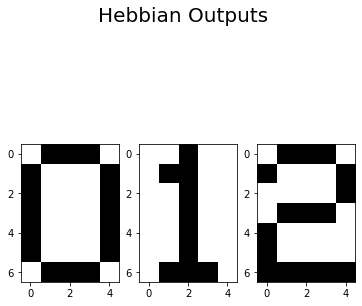

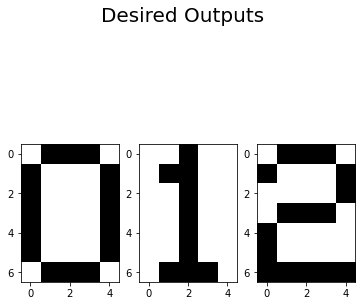

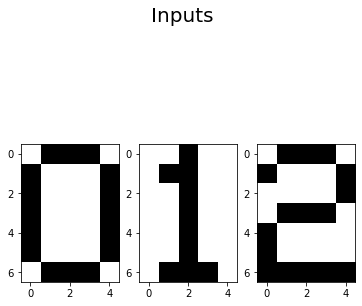

In [ ]:
from matplotlib import pyplot as plt
y = Hebbian(Images, weight1)
final_output = [[] for i in range(N)]
fig = plt.figure(figsize=(6, 6))
fig.suptitle('Hebbian Outputs', fontsize = 20)
for i in range(N):
  final_output[i] = y[i].reshape(7, 5)
  fig.add_subplot(1, 3, i+1)
  plt.imshow(final_output[i], cmap='Greys')
plt.show()

fig = plt.figure(figsize=(6, 6))
fig.suptitle('Desired Outputs', fontsize = 20)
for i in range(N):
  fig.add_subplot(1, 3, i+1)
  plt.imshow(normal_imgs[i], cmap='Greys')
plt.show()

fig = plt.figure(figsize=(6, 6))
fig.suptitle('Inputs', fontsize = 20)
for i in range(N):
  fig.add_subplot(1, 3, i+1)
  plt.imshow(Inputs[i])
plt.show()

In [ ]:
def flip(input, idx):
  l = len(idx)
  out = np.copy(input)
  for i in range(l):
    out[idx[i]] = input[idx[i]]*-1
  return out

In [ ]:
import random
def noisy_input(input, f):
  N = len(input)
  out = input.copy()
  n = int((35*f)/100)
  for i in range(N):
    idx = random.sample(range(35), n)
    out[i] = flip(input[i], idx)
  return out

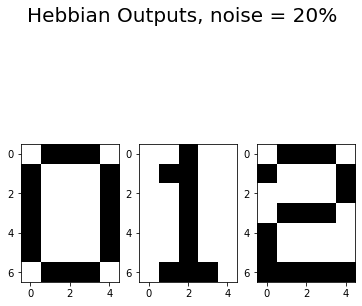

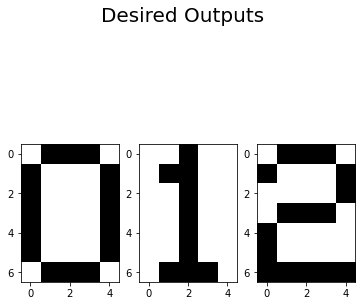

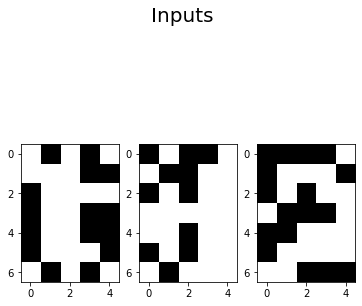

In [ ]:
new_input1 = noisy_input(Images, 20)
y1 = Hebbian(new_input1, weight1)
noisy_final1 = [[] for i in range(N)]
fig = plt.figure(figsize=(6, 6))
fig.suptitle('Hebbian Outputs, noise = 20%', fontsize = 20)
for i in range(N):
  noisy_final1[i] = y1[i].reshape(7, 5)
  fig.add_subplot(1, 3, i+1)
  plt.imshow(noisy_final1[i], cmap='Greys')
plt.show()

fig = plt.figure(figsize=(6, 6))
fig.suptitle('Desired Outputs', fontsize = 20)
for i in range(N):
  fig.add_subplot(1, 3, i+1)
  plt.imshow(normal_imgs[i], cmap='Greys')
plt.show()

fig = plt.figure(figsize=(6, 6))
fig.suptitle('Inputs', fontsize = 20)
for i in range(N):
  fig.add_subplot(1, 3, i+1)
  input = np.array(new_input1[i]).reshape(7, 5)
  plt.imshow(input, cmap='Greys')
plt.show()

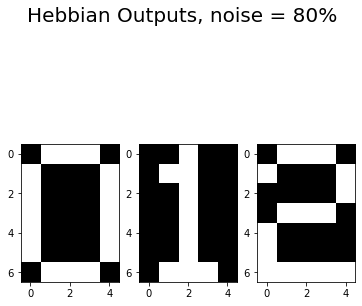

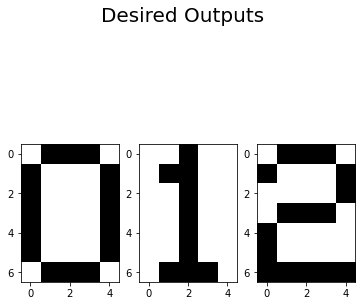

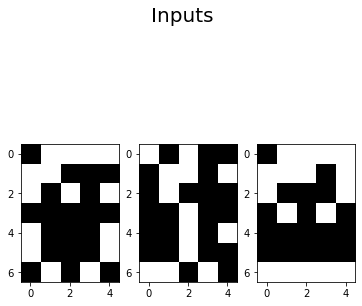

In [ ]:
new_input2 = noisy_input(Images, 80)
y2 = Hebbian(new_input2, weight1)
noisy_final2 = [[] for i in range(N)]
fig = plt.figure(figsize=(6, 6))
fig.suptitle('Hebbian Outputs, noise = 80%', fontsize = 20)

for i in range(N):
  noisy_final2[i] = y2[i].reshape(7, 5)
  fig.add_subplot(1, 3, i+1)
  plt.imshow(noisy_final2[i], cmap='Greys')
plt.show()

fig = plt.figure(figsize=(6, 6))
fig.suptitle('Desired Outputs', fontsize = 20)
for i in range(N):
  fig.add_subplot(1, 3, i+1)
  plt.imshow(normal_imgs[i], cmap='Greys')
plt.show()

fig = plt.figure(figsize=(6, 6))
fig.suptitle('Inputs', fontsize = 20)
for i in range(N):
  fig.add_subplot(1, 3, i+1)
  input = np.array(new_input2[i]).reshape(7, 5)
  plt.imshow(input, cmap='Greys')
plt.show()

In [ ]:
def zero(input, idx):
  l = len(idx)
  out = np.copy(input)
  for i in range(l):
    out[idx[i]] = 0
  return out

In [ ]:
def mis_input(input, f):
  N = len(input)
  out = input.copy()
  n = int((35*f)/100)
  for i in range(N):
    idx = random.sample(range(35), n)
    out[i] = zero(input[i], idx)
  return out

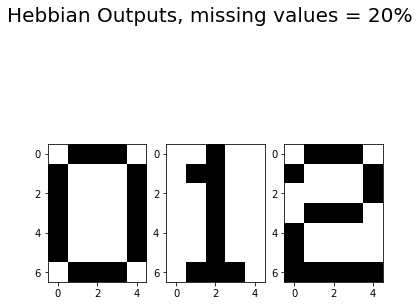

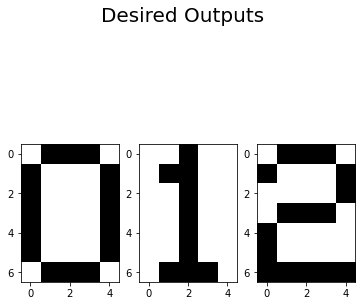

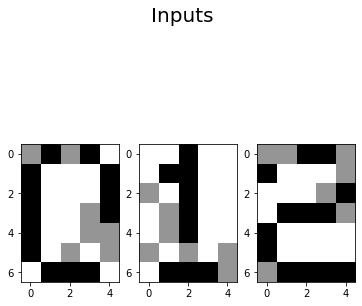

In [ ]:
new_input3 = mis_input(Images, 20)
y3 = Hebbian(new_input3, weight1)
noisy_final3 = [[] for i in range(N)]
fig = plt.figure(figsize=(6, 6))
fig.suptitle('Hebbian Outputs, missing values = 20%', fontsize = 20)

for i in range(N):
  noisy_final3[i] = y3[i].reshape(7, 5)
  fig.add_subplot(1, 3, i+1)
  plt.imshow(noisy_final3[i], cmap='Greys')
plt.show()

fig = plt.figure(figsize=(6, 6))
fig.suptitle('Desired Outputs', fontsize = 20)
for i in range(N):
  fig.add_subplot(1, 3, i+1)
  plt.imshow(normal_imgs[i], cmap='Greys')
plt.show()

fig = plt.figure(figsize=(6, 6))
fig.suptitle('Inputs', fontsize = 20)
for i in range(N):
  fig.add_subplot(1, 3, i+1)
  input = np.array(new_input3[i]).reshape(7, 5)
  plt.imshow(input, cmap='Greys')
plt.show()

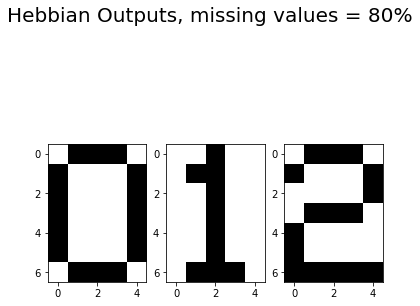

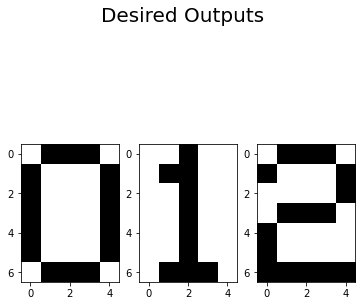

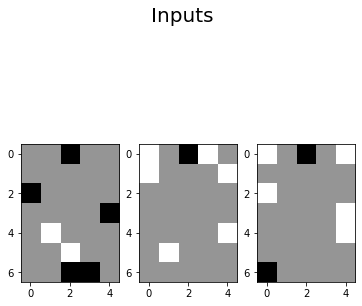

In [ ]:
new_input4 = mis_input(Images, 80)
y4 = Hebbian(new_input4, weight1)
noisy_final4 = [[] for i in range(N)]
fig = plt.figure(figsize=(6, 6))
fig.suptitle('Hebbian Outputs, missing values = 80%', fontsize = 20)

for i in range(N):
  noisy_final4[i] = y4[i].reshape(7, 5)
  fig.add_subplot(1, 3, i+1)
  plt.imshow(noisy_final4[i], cmap='Greys')
plt.show()

fig = plt.figure(figsize=(6, 6))
fig.suptitle('Desired Outputs', fontsize = 20)
for i in range(N):
  fig.add_subplot(1, 3, i+1)
  plt.imshow(normal_imgs[i], cmap='Greys')
plt.show()

fig = plt.figure(figsize=(6, 6))
fig.suptitle('Inputs', fontsize = 20)
for i in range(N):
  fig.add_subplot(1, 3, i+1)
  input = np.array(new_input4[i]).reshape(7, 5)
  plt.imshow(input, cmap='Greys')
plt.show()